# Лабораторная работа №1
## Подготовка данных для построения моделей машинного обучения.
## Визуализация данных

# Регрессия
1.  Получить от преподавателя два датасета с тремя файлами (train.csv, test.csv, sample_submission.csv) для решения задач регрессии и классификации соответственно.
2.	Сделать первичную обработку данных файла train.csv (пропуски, выбросы, генерация новых признаков) для двух датасетов.
3.	Произвести визуализацию данных (распределение признаков, зависимость целевой переменной от других признаков, корреляционная матрица и т.д.) для двух датасетов и сделать выводы на основе полученных графиков.
4.	Сохранить обработанные датасеты в файл с расширением .csv для последующего построения моделей машинного обучения.

# Данные для регрессии

## Для задачи регрессии (цель - предсказание цены недвижимости):
-	Id - идентификационный номер квартиры
-	DistrictId - идентификационный номер района
-	Rooms - количество комнат
-	Square - площадь
-	LifeSquare - жилая площадь
-	KitchenSquare - площадь кухни
-	Floor - этаж
-	HouseFloor - количество этажей в доме
-	HouseYear - год постройки дома
-	Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
-	Social_1, Social_2, Social_3 - социальные показатели местности
-	Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
-	Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
-	Price - цена квартиры (целевая переменная)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scipy import stats
import numpy as np

In [2]:
path = "data/reg/"
filename_test = "test.csv"
filename_train = "train.csv"

res_test_file = path + filename_test
res_train_file = path + filename_train

test_data = pd.read_csv(res_test_file)
train_data = pd.read_csv(res_train_file)

## Предпросмотр данных

In [3]:
train_data.head() # Смотрим на первые 5 строчек, чтобы понять что у нас лежит в табличке

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
train_data.describe() # Первичный просмотр характеристик датасета

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
# for column in train_data.columns:
#     if len(train_data[column].unique()) < 80:
#         print(column)
#         print(len(train_data[column].unique()))
#         print(train_data[column].unique())
print(train_data.Floor.value_counts())
print(train_data.HouseFloor.value_counts())

Floor
4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
31      1
33      1
42      1
37      1
Name: count, dtype: int64
HouseFloor
17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        4
28.0        3
99.0        2
39.0        2
48.0        2
47.0        1
38.0        1
36.0        1
29.0        1
44.0        1
31.0        1
117.0       1
45.0        1
26.0        1
Name: count

## Обработка пропусков

In [6]:
train_data.isnull().sum() # Смотрим наличие пропусков

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Будем заполнять пропуски медианным значением, поскольку оно более устойчиво к выбросам,
чем среднее арифметическое и позволяет сохранить данные, в отличие от простого удаления строк

In [7]:
med = train_data.LifeSquare.median()
train_data.LifeSquare = train_data.LifeSquare.fillna(med)

In [8]:
med = train_data.Healthcare_1.median()
train_data.Healthcare_1 = train_data.Healthcare_1.fillna(med)

In [9]:
train_data.isnull().sum() # Смотрим наличие пропусков

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

## Обработка выбросов

- Для каждого столбца построим Box и гистограмму для наглядного определения выбросов.
- При обнаружении выбросов заменим их на медианное значение в случае работы с количественным признаком.
- Для каждого столбца построим Box и гистограмму для наглядной проверки правильности удаления выбросов.

In [10]:
def show_graph(column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(train_data[column], ax=axes[0])
    sns.kdeplot(train_data[column], ax=axes[1], fill=True)
    sns.boxplot(train_data[column], ax=axes[2])

def remove_outliers(column):
    show_graph(column)
    median = train_data[column].median()
    q25 = train_data[column].quantile(0.25)
    q75 = train_data[column].quantile(0.75)
    iq = q75 - q25

    min_border = q25 - 1.5 * iq
    max_border = q75 + 1.5 * iq

    mask = (train_data[column] < min_border) | (train_data[column] > max_border)

    train_data.loc[mask, column] = median

    show_graph(column)


In [ ]:
for column in train_data.columns:
    if train_data[column].dtype == np.dtypes.ObjectDType:
        continue
    if column == 'Floor' or column == 'HouseFloor':
        continue
    remove_outliers(column)


In [58]:
train_data = pd.get_dummies(train_data, dtype=int)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809.0,27,3.0,52.513310,32.781260,10.0,4,10.0,2014,0.075424,...,900.0,0,0,305018.871089,0,1,0,1,0,1
1,3013.0,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,177734.553407,0,1,0,1,0,1
2,8215.0,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,900.0,3,1,282078.720850,0,1,0,1,0,1
3,2352.0,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,900.0,0,1,168106.007630,0,1,0,1,0,1
4,13866.0,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,900.0,0,6,343995.102962,0,1,0,1,0,1


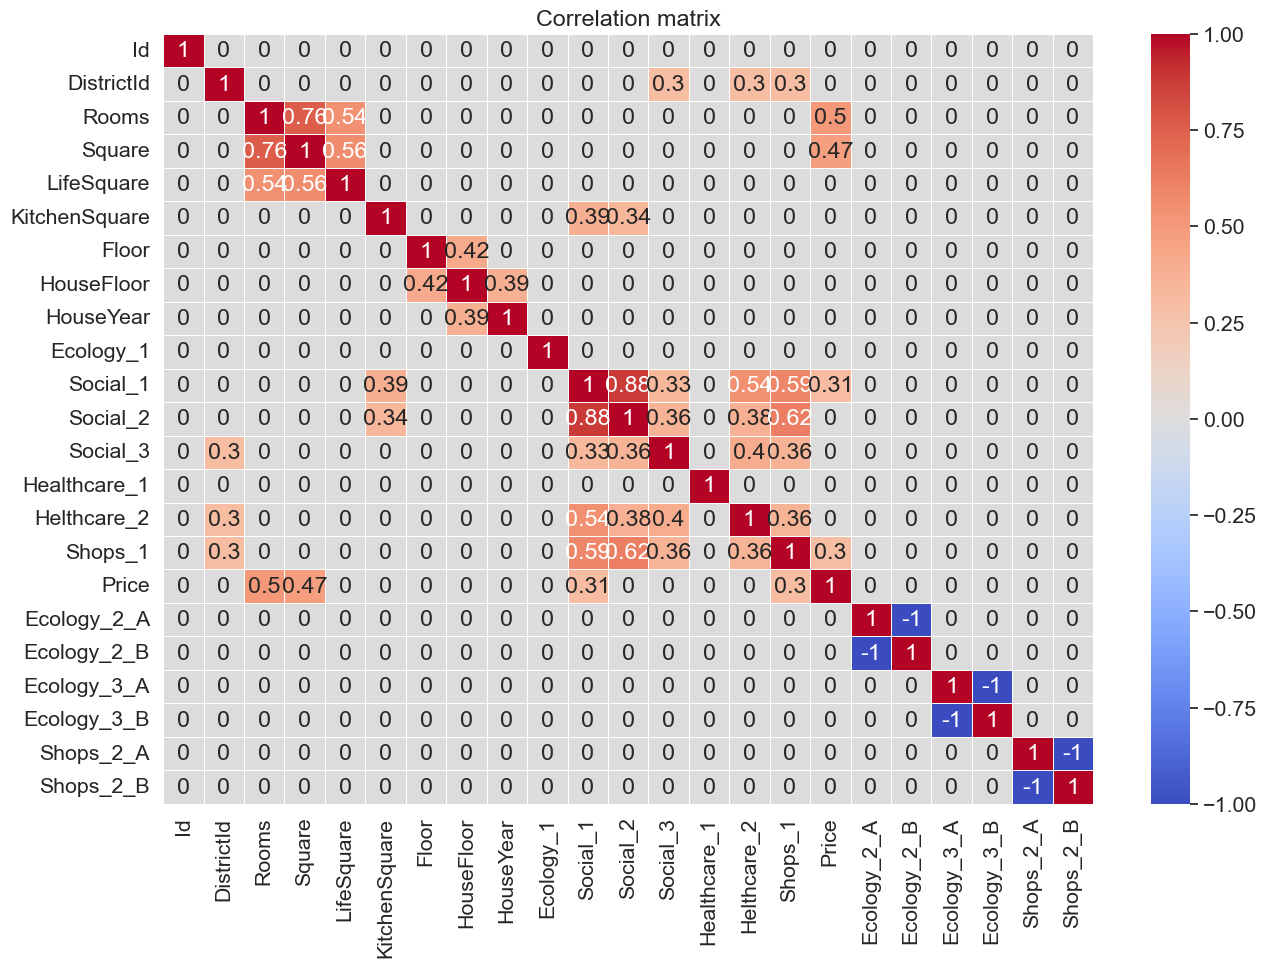

In [59]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_data.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, square=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[train_data.columns[:-6]])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_data.columns[:-6])

answer = pd.concat([X_train_scaled, train_data[train_data.columns[17:]]], axis=1)


In [61]:
answer

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0.705032,-0.512292,1.514573,-0.135034,-0.027677,1.114850,-0.863728,-0.385115,1.603794,-0.354489,...,-0.069721,-0.895277,-1.084587,1.604303,0,1,0,1,0,1
1,-1.105301,-0.643667,-1.122678,-0.934640,-0.920233,0.599050,-0.291306,-0.680290,-1.055585,0.020204,...,3.949634,-0.190334,-1.084587,-0.305228,0,1,0,1,0,1
2,-0.034661,-1.195445,1.514573,1.493647,1.355046,1.114850,-1.245343,0.647998,0.163297,-0.787417,...,-0.069721,1.219550,-0.760229,1.260153,0,1,0,1,0,1
3,-1.241343,-1.195445,-1.122678,-0.898232,-0.027677,-1.206249,0.281117,1.385936,-0.446144,-0.948083,...,-0.069721,-0.895277,-0.760229,-0.449676,0,1,0,1,0,1
4,1.128390,1.248143,0.195948,0.607252,0.509159,0.856950,1.425961,0.500411,-0.723163,1.447759,...,-0.069721,-0.895277,0.861558,2.189028,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.466091,0.381063,0.195948,-0.350850,0.017950,0.083250,-1.054535,-0.089940,-0.224529,1.600065,...,-0.069721,-0.190334,1.834631,-1.180857,0,1,0,1,0,1
9996,1.622135,-0.512292,0.195948,0.608678,0.367634,0.856950,0.853539,-1.860992,-0.446144,-0.382874,...,-0.069721,-0.895277,-1.084587,0.024527,0,1,0,1,1,0
9997,-1.150168,-0.275815,-1.122678,-1.576837,-1.534383,-0.174650,-1.054535,-1.123053,-1.498815,2.992627,...,-0.069721,-0.190334,0.537201,-0.481962,0,1,0,1,0,1
9998,1.271430,-0.669943,-1.122678,-1.407704,-0.998452,-0.174650,-1.054535,-0.532703,-0.889374,0.680288,...,-0.069721,1.219550,0.537201,-0.393623,0,1,0,1,0,1
